In [1]:
import numpy as np
from mpi4py import MPI
import matplotlib.pyplot as plt
from PIL import Image
import time
import sys
import os
from glob import glob

In [2]:
config_paths = glob(f"./patterns/*.txt")

In [3]:
config_paths

['./patterns/gosper-glider-gun.txt',
 './patterns/pulsar.txt',
 './patterns/living-forever-2.txt',
 './patterns/living-forever-1.txt',
 './patterns/living-forever-3.txt',
 './patterns/glider.txt',
 './patterns/empty.txt']

In [4]:
def init_game(filename):
    lines = []
    cols = None
    rows = 0
    cells = []
    with open(filename) as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]

    for line in lines:
        line = line.strip()
        if cols is None:
            cols = len(line)
        else:
            assert cols == len(line)
        cells.append([x == 'X' for x in line])
        rows += 1
    game = np.array(cells, dtype=np.int32)
    W = game.shape[1]
    H = game.shape[0]
    padx1, padx2, pady1, pady2 = int((200-W) / 2), int((200-W) / 2), int((200-H) / 2), int((200-H) / 2)
    game = np.pad(game, (((pady1,pady2),(padx1,padx2))))
    return game, game.sum()

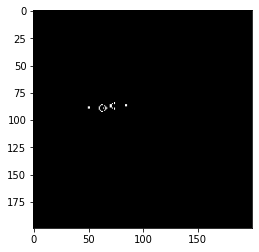

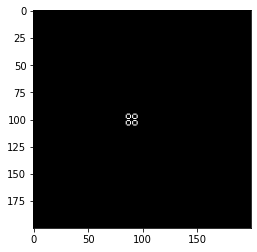

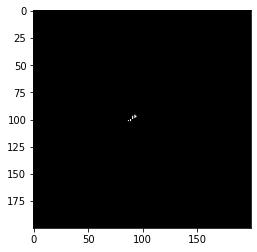

In [5]:
for i in range(3):
    plt.imshow(init_game(config_paths[i])[0], cmap='gray')
    plt.show()

In [6]:
from scipy.signal import convolve2d
import numpy as np

K = np.ones((3, 3), dtype=np.int32)
K[1, 1] = 0

def step(M):
    num_alive = convolve2d(M, K, mode='same')
    dead2alive = (M == 0) & (num_alive == 3)
    alive2alive = (M == 1) & (1 < num_alive) & (num_alive < 4)
    M_res = np.zeros_like(M)
    M_res[dead2alive] = 1
    M_res[alive2alive] = 1
    return M_res, np.sum(M_res)

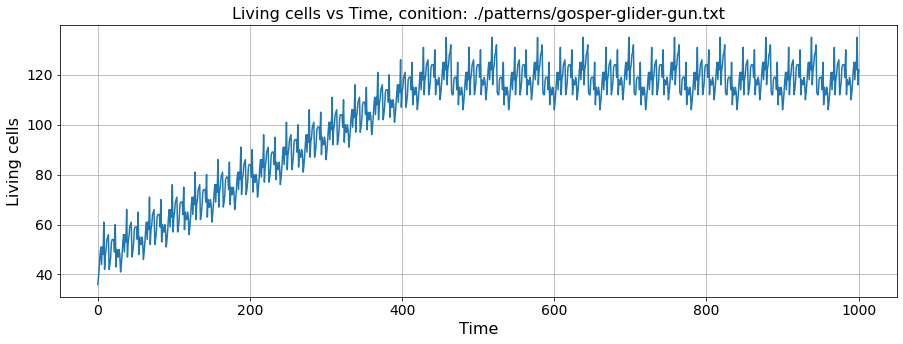

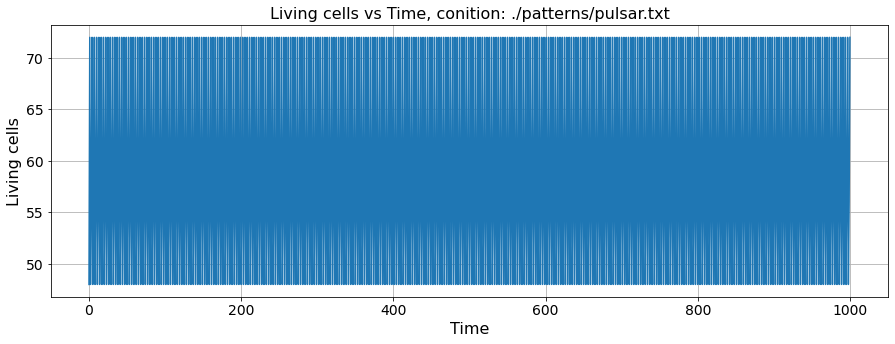

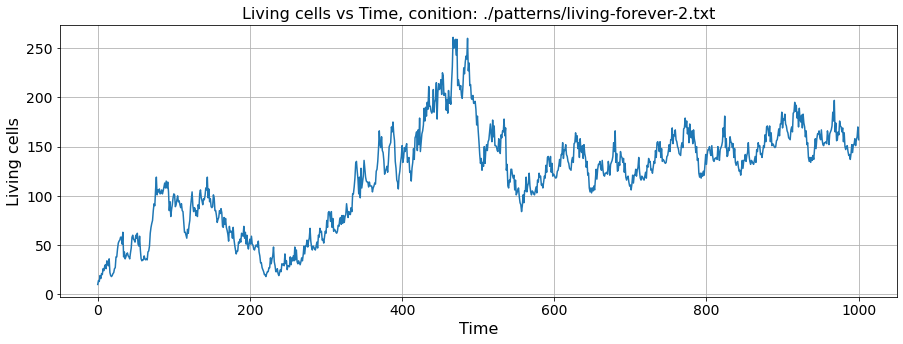

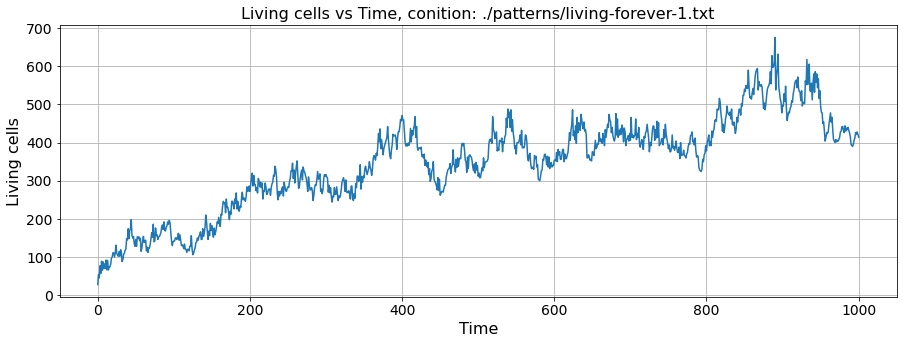

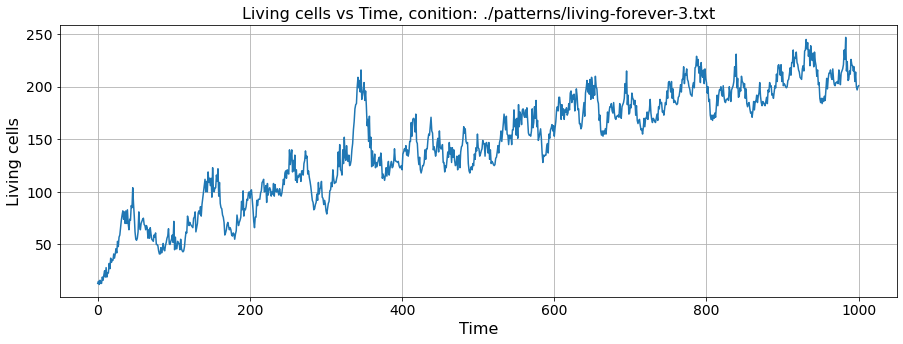

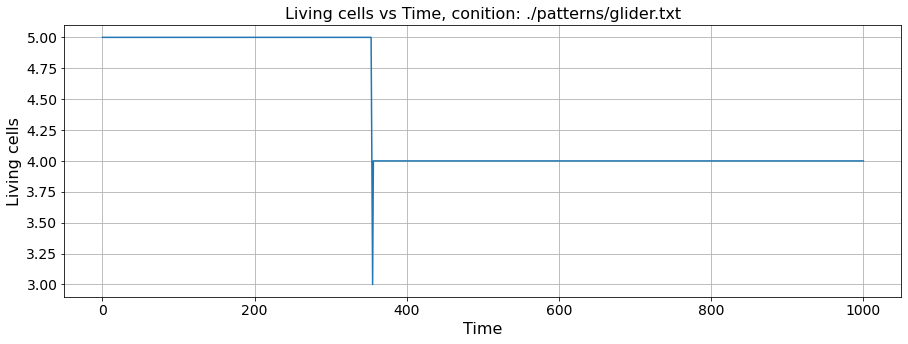

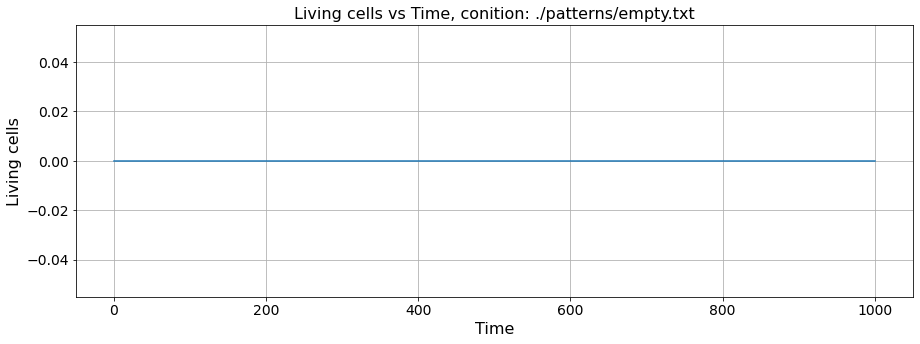

In [7]:
epochs = 1000
for p in config_paths:
    game = init_game(p)
    history = [game]
    imgs = []
    for i in range(epochs):
        imgs.append(Image.fromarray(np.uint8(game[0] * 255)))
        game = step(game[0])
        history.append(game)
    name = p.split('.')[1]
    imgs[0].save(f'./{name}.gif', save_all=True, append_images=imgs[1:], loop=0, duration=250)
    
    alive = [history[i][1] for i in range(len(history))]
    alive = np.array(alive)

    plt.figure(figsize=(15, 5))
    plt.title(f'Living cells vs Time, conition: {p}', fontsize=16)
    plt.ylabel('Living cells', fontsize=16)
    plt.xlabel('Time', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    plt.plot(alive)
    plt.show()